# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objs as go
from collections import Counter,OrderedDict
sns.set()

# Data Processing and Cleaning

In [2]:
df=pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
df.shape

(16744, 16)

In [4]:
df.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [5]:
df.drop(['Age','Rotten Tomatoes','Type'],axis=1,inplace=True)

In [6]:
df=df.dropna()
df.isnull().sum()

ID             0
Title          0
Year           0
IMDb           0
Netflix        0
Hulu           0
Prime Video    0
Disney+        0
Directors      0
Genres         0
Country        0
Language       0
Runtime        0
dtype: int64

In [7]:
df.shape

(15233, 13)

In [8]:
df=df.reset_index()
df.drop('index',axis=1,inplace=True)

In [9]:
df['Service Provider'] = df.loc[:,['Netflix','Prime Video','Disney+','Hulu']].idxmax(axis=1)
df.drop(['Netflix','Prime Video','Disney+','Hulu'],axis=1,inplace=True)

In [10]:
#Distribution of OTT Platforms 
ott_platform =  ['Netflix', 'Prime Video', 'Disney+', 'Hulu']
sizes = [len(df[df['Service Provider']=='Netflix']), len(df[df['Service Provider']=='Prime Video']), len(df[df['Service Provider']=='Disney+']), len(df[df['Service Provider']=='Hulu'])]
trace = go.Pie(labels = ott_platform, values = sizes)
data = [trace]
fig = go.Figure(data = data)
iplot(fig)

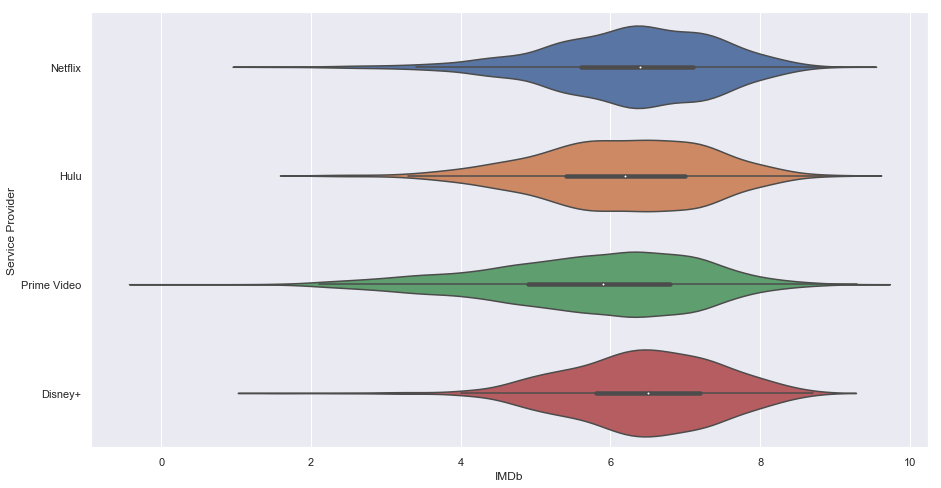

In [11]:
#Distribution of movie rating in each platform
plt.figure(figsize=(15,8))
sns.violinplot(x=df['IMDb'],y=df['Service Provider'])

In [12]:
#Highest Rated Movie Each Year
movie_each_year= df.loc[df.groupby("Year")["IMDb"].idxmax()].reset_index()
movie_each_year.drop('index',axis=1,inplace=True)
movie_each_year.loc[:,['Title','Year','IMDb']]

,Title,Year,IMDb
0,A Trip to the Moon,1902,8.2
1,From the Manger to the Cross,1912,5.7
2,Fatty Joins the Force,1913,5.3
3,The Birth of a Nation,1915,6.4
4,Intolerance: Love's Struggle Throughout the Ages,1916,7.8
...,...,...,...
102,Natsamrat,2016,9.1
103,Where's Daddy?,2017,9.1
104,Operation Toussaint: Operation Underground Rai...,2018,8.8
105,Square One,2019,9.3


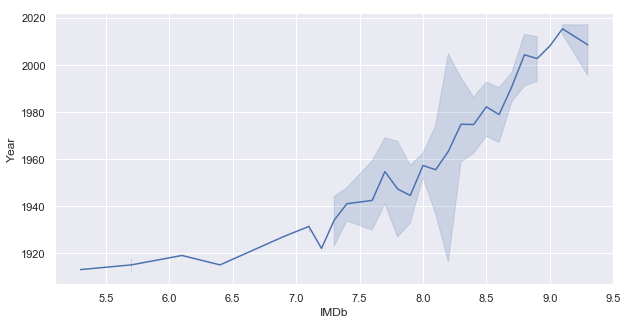

In [13]:
#Change of best movie rating over the years
plt.figure(figsize=(10,5))
sns.lineplot(x='IMDb',y='Year',data=movie_each_year)

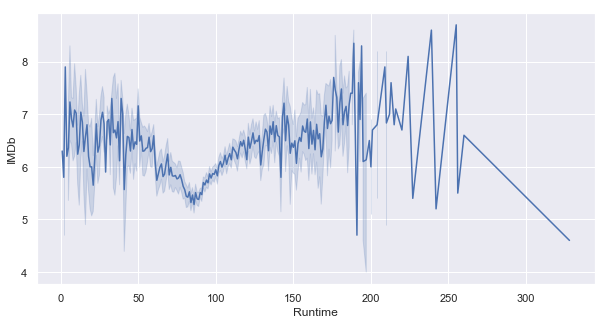

In [14]:
#Effect of runtime on rating
plt.figure(figsize=(10,5))
sns.lineplot(x='Runtime',y='IMDb',data=df)

In [16]:
#Seperating based on ott platform
netflix=[]
prime=[]
disney=[]
hulu=[]

for i in range(len(df)):
    if(df['Service Provider'][i]=='Netflix'):
        netflix.append(df['Genres'][i])
    elif(df['Service Provider'][i]=='Prime Video'):
        prime.append(df['Genres'][i])
    elif(df['Service Provider'][i]=='Disney+'):
        disney.append(df['Genres'][i])
    elif(df['Service Provider'][i]=='Hulu'):
        hulu.append(df['Genres'][i])

netflix=" ".join(netflix)
prime=" ".join(prime)
disney=" ".join(disney)
hulu=" ".join(hulu)

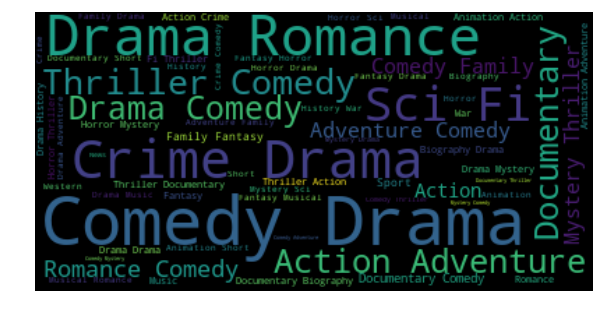

In [17]:
#Most common genres of movies in Netflix
wordcloud = WordCloud(stopwords=STOPWORDS).generate(netflix) 
  
# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

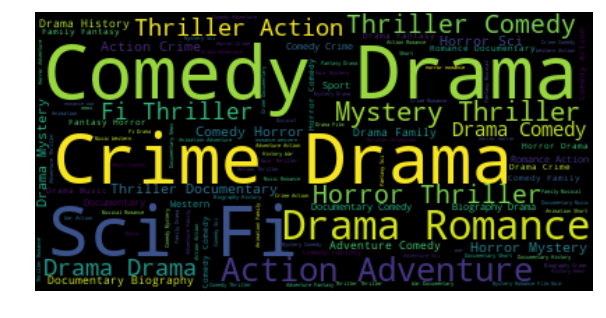

In [18]:
#Most common genres of movies in Prime
wordcloud = WordCloud(stopwords=STOPWORDS).generate(prime) 
  
# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

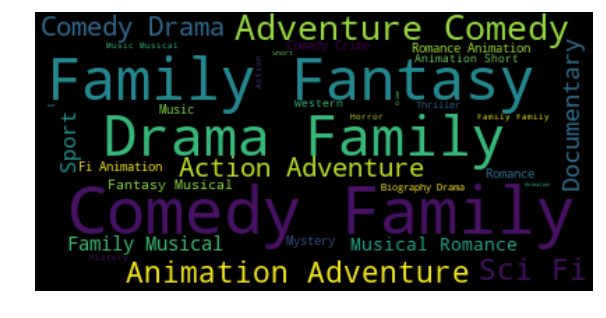

In [19]:
#Most common genres of movies in Disney+
wordcloud = WordCloud(stopwords=STOPWORDS).generate(disney) 
  
# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

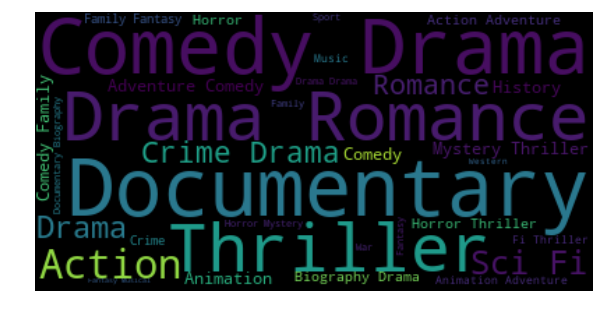

In [20]:
#Most common genres of movies in Hulu
wordcloud = WordCloud(stopwords=STOPWORDS).generate(hulu) 
  
# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
df.head()

,ID,Title,Year,IMDb,Directors,Genres,Country,Language,Runtime,Service Provider
0,1,Inception,2010,8.8,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Netflix
1,2,The Matrix,1999,8.7,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Netflix
2,3,Avengers: Infinity War,2018,8.5,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Netflix
3,4,Back to the Future,1985,8.5,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Netflix
4,5,"The Good, the Bad and the Ugly",1966,8.8,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Netflix


In [22]:
#Average Runtime length of each ott platform
df.groupby("Service Provider")["Runtime"].mean()

Service Provider
Disney+         90.648544
Hulu            96.492487
Netflix        100.685596
Prime Video     92.765022
Name: Runtime, dtype: float64

In [23]:
#Average IMDb rating of each ott platform
df.groupby("Service Provider")["IMDb"].mean()

Service Provider
Disney+        6.429126
Hulu           6.155927
Netflix        6.273382
Prime Video    5.753278
Name: IMDb, dtype: float64

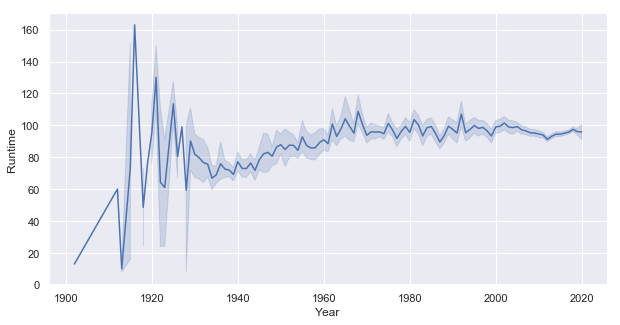

In [24]:
#Runtime length movie changing in years
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='Runtime',data=df)

In [25]:
#Top 10 movies
df.sort_values('IMDb',ascending=False)[:10].reset_index().drop(['ID','index','Country','Language'],axis=1)

,Title,Year,IMDb,Directors,Genres,Runtime,Service Provider
0,"Down, But Not Out!",2015,9.3,Miguel Gaudêncio,"Documentary,Sport",68.0,Prime Video
1,Steven Banks: Home Entertainment Center,1989,9.3,Tom McLoughlin,Comedy,60.0,Prime Video
2,Square One,2019,9.3,Danny Wu,"Documentary,Drama,Music",83.0,Prime Video
3,Bounty,2011,9.3,Roger Donaldson,"Adventure,Drama,History,Romance",132.0,Prime Video
4,Natsamrat,2016,9.1,Mahesh Manjrekar,"Drama,Family",166.0,Netflix
5,Finding Family,2013,9.1,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War",56.0,Prime Video
6,Where's Daddy?,2017,9.1,Rel Dowdell,Documentary,105.0,Prime Video
7,A Dog Named Gucci,2015,9.0,Gorman Bechard,"Documentary,Biography,Drama,News",90.0,Prime Video
8,Escape from Firebase Kate,2015,9.0,Paul Kakert,Documentary,60.0,Prime Video
9,The Dark Knight,2008,9.0,Christopher Nolan,"Action,Crime,Drama,Thriller",152.0,Hulu


In [26]:
#Top 10 movies of netflix
df[df['Service Provider']=='Netflix'].sort_values('IMDb',ascending=False)[:10].reset_index().drop(['ID','index','Country','Language'],axis=1)

,Title,Year,IMDb,Directors,Genres,Runtime,Service Provider
0,Natsamrat,2016,9.1,Mahesh Manjrekar,"Drama,Family",166.0,Netflix
1,Inception,2010,8.8,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller",148.0,Netflix
2,"The Good, the Bad and the Ugly",1966,8.8,Sergio Leone,Western,161.0,Netflix
3,Bill Hicks: Relentless,1992,8.7,Chris Bould,"Documentary,Comedy",61.0,Netflix
4,Eh Janam Tumhare Lekhe,2015,8.7,Harjit Singh,Biography,135.0,Netflix
5,Untamed Romania,2018,8.7,Tom Barton-Humphreys,Documentary,92.0,Netflix
6,The Matrix,1999,8.7,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",136.0,Netflix
7,Bill Hicks: Revelations,1993,8.6,Chris Bould,"Documentary,Comedy",57.0,Netflix
8,Merku Thodarchi Malai,2018,8.6,Leninbharati,Drama,122.0,Netflix
9,Luciano Mellera: Infantiloide,2018,8.6,"Raúl Campos,Jan Suter",Comedy,66.0,Netflix


In [27]:
#Top 10 movies of prime
df[df['Service Provider']=='Prime Video'].sort_values('IMDb',ascending=False)[:10].reset_index().drop(['ID','index','Country','Language'],axis=1)

,Title,Year,IMDb,Directors,Genres,Runtime,Service Provider
0,"Down, But Not Out!",2015,9.3,Miguel Gaudêncio,"Documentary,Sport",68.0,Prime Video
1,Bounty,2011,9.3,Roger Donaldson,"Adventure,Drama,History,Romance",132.0,Prime Video
2,Square One,2019,9.3,Danny Wu,"Documentary,Drama,Music",83.0,Prime Video
3,Steven Banks: Home Entertainment Center,1989,9.3,Tom McLoughlin,Comedy,60.0,Prime Video
4,Where's Daddy?,2017,9.1,Rel Dowdell,Documentary,105.0,Prime Video
5,Finding Family,2013,9.1,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War",56.0,Prime Video
6,Escape from Firebase Kate,2015,9.0,Paul Kakert,Documentary,60.0,Prime Video
7,A Dog Named Gucci,2015,9.0,Gorman Bechard,"Documentary,Biography,Drama,News",90.0,Prime Video
8,Peter Gabriel: Secret World Live,1993,8.9,François Girard,"Documentary,Music",102.0,Prime Video
9,The Jones Family Will Make a Way,2015,8.9,Alan Berg,"Documentary,Drama,Family,Music",91.0,Prime Video


In [29]:
#Top 10 movies of disney+
df[df['Service Provider']=='Disney+'].sort_values('IMDb',ascending=False)[:10].reset_index().drop(['ID','index','Country','Language'],axis=1)

,Title,Year,IMDb,Directors,Genres,Runtime,Service Provider
0,Star Wars: The Empire Strikes Back,1980,8.7,Irvin Kershner,"Action,Adventure,Fantasy,Sci-Fi",124.0,Disney+
1,Star Wars: A New Hope,1977,8.6,George Lucas,"Action,Adventure,Fantasy,Sci-Fi",121.0,Disney+
2,Newsies: The Broadway Musical,2017,8.5,"Jeff Calhoun,Brett Sullivan",Musical,149.0,Disney+
3,The Lion King,1994,8.5,Jon Favreau,"Animation,Adventure,Drama,Family,Musical",118.0,Disney+
4,Avengers: Endgame,2019,8.4,"Anthony Russo,Joe Russo","Action,Adventure,Drama,Sci-Fi",181.0,Disney+
5,WALL·E,2008,8.4,Andrew Stanton,"Animation,Adventure,Family,Sci-Fi",98.0,Disney+
6,Coco,2017,8.4,"Lee Unkrich,Adrian Molina","Animation,Adventure,Family,Fantasy,Music,Mystery",105.0,Disney+
7,Star Wars: Return of the Jedi,1983,8.3,Richard Marquand,"Action,Adventure,Fantasy,Sci-Fi",131.0,Disney+
8,Toy Story,1995,8.3,John Lasseter,"Animation,Adventure,Comedy,Family,Fantasy",81.0,Disney+
9,Before the Flood,2016,8.3,Fisher Stevens,Documentary,96.0,Disney+


In [30]:
#Top 10 movies of hulu
df[df['Service Provider']=='Hulu'].sort_values('IMDb',ascending=False)[:10].reset_index().drop(['ID','index','Country','Language'],axis=1)

,Title,Year,IMDb,Directors,Genres,Runtime,Service Provider
0,The Dark Knight,2008,9.0,Christopher Nolan,"Action,Crime,Drama,Thriller",152.0,Hulu
1,GoodFellas,1990,8.7,Martin Scorsese,"Biography,Crime,Drama",146.0,Hulu
2,The Green Mile,1999,8.6,Frank Darabont,"Crime,Drama,Fantasy,Mystery",189.0,Hulu
3,Grave of the Fireflies,1988,8.5,Isao Takahata,"Animation,Drama,War",89.0,Hulu
4,Larger than Life: The Kevyn Aucoin Story,2017,8.3,Tiffany Bartok,Documentary,102.0,Hulu
5,Good Will Hunting,1997,8.3,Gus Van Sant,"Drama,Romance",126.0,Hulu
6,Batman Begins,2005,8.2,Christopher Nolan,"Action,Adventure",140.0,Hulu
7,Portrait of a Lady on Fire,2019,8.2,Céline Sciamma,"Drama,Romance",122.0,Hulu
8,Monkey Business: The Adventures of Curious Geo...,2017,8.2,Ema Ryan Yamazaki,Documentary,81.0,Hulu
9,Apollo 11,2019,8.2,Todd Douglas Miller,"Documentary,History",93.0,Hulu


In [32]:
#Collecting the genres
genres=[]
for i in range(len(df)):
    x=df['Genres'][i]
    y=x.split(',')
    for j in range(len(y)):
        genres.append(y[j])

genre_c = Counter(genres)
genre_c

Counter({'Action': 2566,
         'Adventure': 1691,
         'Sci-Fi': 1167,
         'Thriller': 3197,
         'Comedy': 4336,
         'Western': 483,
         'Animation': 628,
         'Family': 1408,
         'Biography': 785,
         'Drama': 6828,
         'Music': 614,
         'War': 517,
         'Crime': 1728,
         'Fantasy': 1012,
         'Romance': 2265,
         'History': 671,
         'Mystery': 1180,
         'Horror': 2135,
         'Sport': 376,
         'Documentary': 2233,
         'Musical': 387,
         'News': 96,
         'Short': 290,
         'Reality-TV': 5,
         'Film-Noir': 79,
         'Talk-Show': 1})

In [43]:
#Most popular genres
data = [go.Bar(
   x = list(genre_c.keys()),
   y = list(genre_c.values())
)]
fig = go.Figure(data=data)
iplot(fig)

In [44]:
#Collecting the directors names
directors=[]
for i in range(len(df)):
    x=df['Directors'][i]
    y=x.split(',')
    for j in range(len(y)):
        directors.append(y[j])
        
director_c = Counter(directors)
director_c_10=OrderedDict(director_c.most_common()[:10])

In [48]:
#Directors with most movies
data = [go.Bar(
   x = list(director_c_10.keys()),
   y = list(director_c_10.values()))]
fig = go.Figure(data=data)
iplot(fig)

In [51]:
#Extracting the countries
country=[]
for i in range(len(df)):
    x=df['Country'][i]
    y=x.split(',')
    for j in range(len(y)):
        country.append(y[j])
        
country_c = Counter(country)
country_c_15=OrderedDict(country_c.most_common()[:15])

In [50]:
#Countries with most movies
data = [go.Bar(
   x = list(country_c_15.keys()),
   y = list(country_c_15.values())
)]
fig = go.Figure(data=data)
iplot(fig)